# NetworkX 基础

# 绘制图形

## 载入套件

In [1]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt

## 建立新图形

In [2]:
G = nx.Graph()

## 加入节点的各种指令

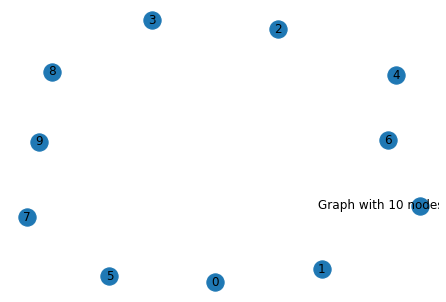

In [3]:
# 加一个节点
G.add_node(1)

# 一次加 2 个节点
G.add_nodes_from([2, 3])

# 加 2 个节点，并添加颜色属性
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

# 产生 0~9 共 10 个节点
H = nx.path_graph(10) 
# 将 H 图形所有节点，并入 G 图形
G.add_nodes_from(H)

# 将 H 图形当作一个节点，并入 G 图形
G.add_node(H)

# 绘制图形
nx.draw(G, with_labels=True)

## 加入边的各种指令

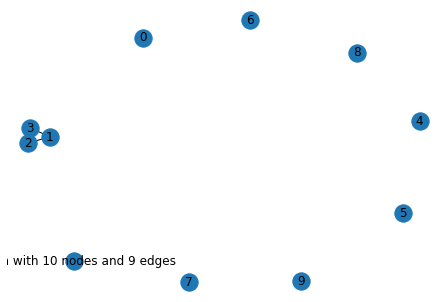

In [4]:
# 加边，连接节点 1 及 2
G.add_edge(1, 2)

# 另一种写法
e = (2, 3)
G.add_edge(*e)  

# 一次加 2 条边
G.add_edges_from([(1, 2), (1, 3)])

# 绘制图形
nx.draw(G, with_labels=True)

## 取得节点及边个数

In [5]:
G.number_of_nodes(), G.number_of_edges()

(11, 3)

## 取得所有节点及边

In [6]:
G.nodes(), G.edges()

(NodeView((1, 2, 3, 4, 5, 0, 6, 7, 8, 9, <networkx.classes.graph.Graph object at 0x000001A34812FF70>)),
 EdgeView([(1, 2), (1, 3), (2, 3)]))

In [7]:
# 加边，连接节点 3 及 4、4 及 5
G.add_edges_from([(3, 4), (4, 5)], color='red')

# 指定节点名称，取得连接的节点及属性
G[1], G[4]

(AtlasView({2: {}, 3: {}}),
 AtlasView({3: {'color': 'red'}, 5: {'color': 'red'}}))

In [8]:
# 移除节点 2
G.remove_node(2)

# 移除边 1-3
G.remove_edge(1, 3)

# 移除多个节点
G.remove_nodes_from([4, 5])

# 移除多个边
G.remove_edges_from([(1, 2), (2, 3)])

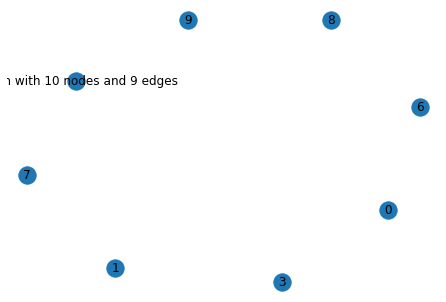

In [9]:
# 绘制图形
nx.draw(G, with_labels=True, cmap = plt.get_cmap('rainbow'))

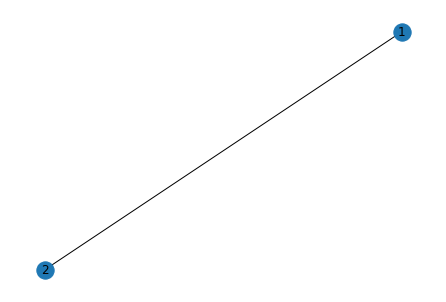

In [10]:
# 建立新图形，同时加节点、边及属性
G = nx.Graph([(1, 2, {"color": "yellow"})])

# 绘制图形
nx.draw(G, with_labels=True, cmap = plt.get_cmap('rainbow'))

## 清除所有节点及边

In [11]:
G.clear()

## 绘图

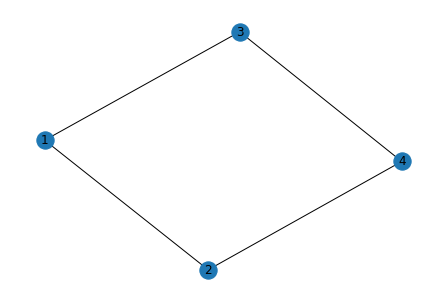

In [12]:
# 建立图形
G = nx.Graph()

# 一次加 3 个节点
G.add_nodes_from([1, 2, 3, 4])

# 加边
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 4)
G.add_edge(3, 4)

# Plot the graph
nx.draw(G, with_labels=True)

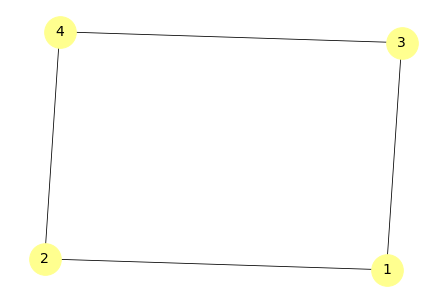

In [13]:
# 其他属性
nx.draw(G,
    with_labels=True,
    node_size=1000,
    node_color="#ffff8f",
    width=0.8,
    font_size=14,
)

In [14]:
# save as PNG
plt.savefig("./graph/1.png");

<Figure size 432x288 with 0 Axes>

## 以属性为边的宽度

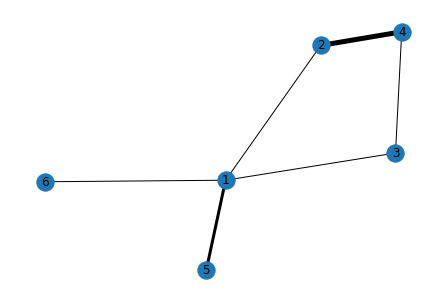

In [97]:
# 建立图形
G = nx.Graph()

G.add_edge("1", "2")
G.add_edge("1", "6")
G.add_edges_from([("1", "3"), 
                  ("3", "4")])
G.add_edges_from([("1", "5", {"weight" : 3}), 
                  ("2", "4", {"weight" : 5})])

# 权重计算
weights = [1 if G[u][v] == {} else G[u][v]['weight'] for u,v in G.edges()]
# 以权重作为线条的宽度
nx.draw(G, with_labels=True, cmap = plt.get_cmap('rainbow'), width=weights)

## 有向图(Directed Graph)

In [17]:
DG = nx.DiGraph()
DG.add_edge(2, 1)   
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)

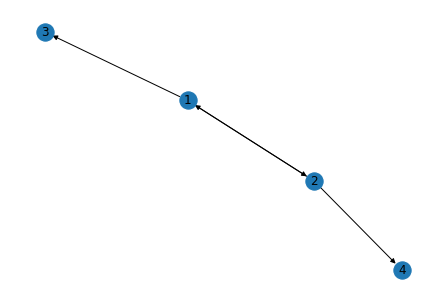

In [18]:
# Plot the graph
nx.draw(DG, with_labels=True, cmap = plt.get_cmap('rainbow'))

In [19]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (2, 3, 0.75)])
DG.out_degree(1, weight='weight') # 指定 OutEdgeView 观看的属性
list(DG.successors(1))

[2]

In [20]:
# 邻居，在有向图会等于 DG.successors
list(DG.neighbors(2))

[3]

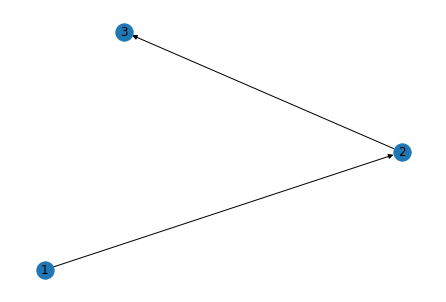

In [21]:
# Plot the graph
nx.draw(DG, with_labels=True, cmap = plt.get_cmap('rainbow'))

## 载入XML档案

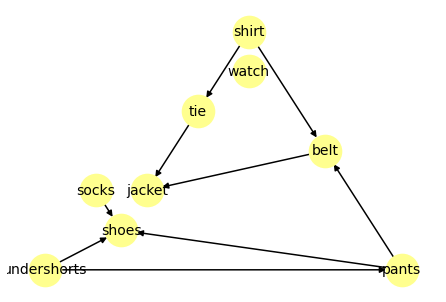

In [22]:
clothing_graph = nx.read_graphml("./graph/clothing_graph.graphml")
nx.draw_planar(clothing_graph,
    arrowsize=12,
    with_labels=True,
    node_size=1000,
    node_color="#ffff8f",
    linewidths=2.0,
    width=1.5,
    font_size=14,
)

## 绘制图形演算法

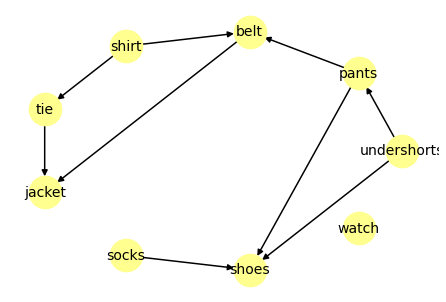

In [23]:
nx.draw_circular(clothing_graph,
    arrowsize=12,
    with_labels=True,
    node_size=1000,
    node_color="#ffff8f",
    linewidths=2.0,
    width=1.5,
    font_size=14,
)

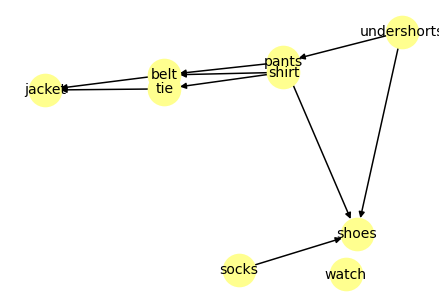

In [24]:
nx.draw_kamada_kawai(clothing_graph,
    arrowsize=12,
    with_labels=True,
    node_size=1000,
    node_color="#ffff8f",
    linewidths=2.0,
    width=1.5,
    font_size=14,
)

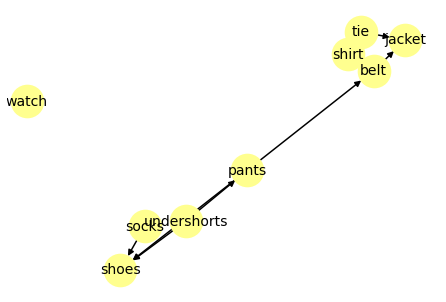

In [25]:
nx.draw_spring(clothing_graph,
    arrowsize=12,
    with_labels=True,
    node_size=1000,
    node_color="#ffff8f",
    linewidths=2.0,
    width=1.5,
    font_size=14,
)

## 载入NetworkX套件内建资料集

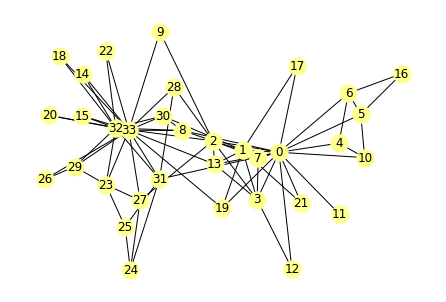

In [26]:
# 载入内建资料
G_karate = nx.karate_club_graph()
# 指定布局，取得节点座标
pos = nx.spring_layout(G_karate) 
# 绘制图形
nx.draw(G_karate, node_color="#ffff8f", with_labels=True, pos=pos)

In [27]:
# 统计每个节点的连结个数
G_karate.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [28]:
G_karate.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [29]:
pos

{0: array([ 0.39028026, -0.02355608]),
 1: array([ 0.20952178, -0.01660398]),
 2: array([0.06203051, 0.01676747]),
 3: array([ 0.28182466, -0.19088706]),
 4: array([0.68794251, 0.00867417]),
 5: array([0.79640526, 0.11018978]),
 6: array([0.73539127, 0.18513105]),
 7: array([ 0.28701959, -0.04303119]),
 8: array([-0.08925716,  0.0532557 ]),
 9: array([-0.20095847,  0.402336  ]),
 10: array([ 0.81631695, -0.04243442]),
 11: array([ 0.69227571, -0.24350358]),
 12: array([ 0.45428985, -0.4352726 ]),
 13: array([ 0.07093376, -0.06614855]),
 14: array([-0.58533408,  0.25412768]),
 15: array([-0.58874554,  0.10574652]),
 16: array([1.        , 0.25423695]),
 17: array([0.47994169, 0.28076718]),
 18: array([-0.69903068,  0.31560696]),
 19: array([ 0.10793167, -0.22109874]),
 20: array([-0.75060405,  0.10685383]),
 21: array([ 0.50083754, -0.20324902]),
 22: array([-0.47071599,  0.33529522]),
 23: array([-0.46926368, -0.13810335]),
 24: array([-0.34792124, -0.43911574]),
 25: array([-0.3740298

In [30]:
G_karate.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

## 连结个数直方图

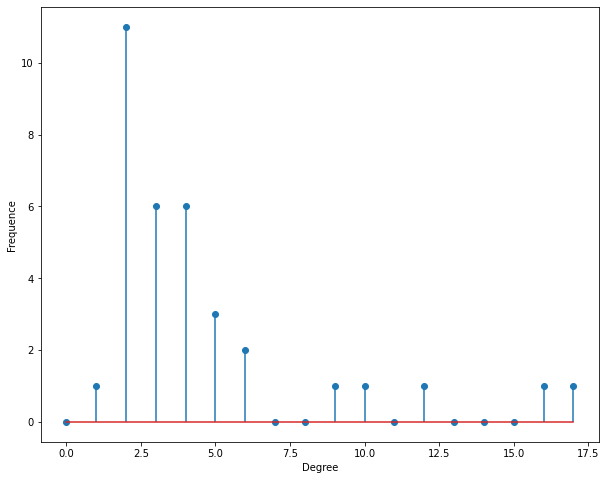

In [31]:
degree_freq = np.array(nx.degree_histogram(G_karate)).astype('float')
plt.figure(figsize=(10, 8))
plt.stem(degree_freq)  # 绘制垂直线
plt.ylabel("Frequence")
plt.xlabel("Degree")
plt.show()

## 寻找最短路径

In [32]:
# 传回每一条最短路径
nx.shortest_path(G_karate)

{0: {0: [0],
  1: [0, 1],
  2: [0, 2],
  3: [0, 3],
  4: [0, 4],
  5: [0, 5],
  6: [0, 6],
  7: [0, 7],
  8: [0, 8],
  10: [0, 10],
  11: [0, 11],
  12: [0, 12],
  13: [0, 13],
  17: [0, 17],
  19: [0, 19],
  21: [0, 21],
  31: [0, 31],
  30: [0, 1, 30],
  9: [0, 2, 9],
  27: [0, 2, 27],
  28: [0, 2, 28],
  32: [0, 2, 32],
  16: [0, 5, 16],
  33: [0, 8, 33],
  24: [0, 31, 24],
  25: [0, 31, 25],
  23: [0, 2, 27, 23],
  14: [0, 2, 32, 14],
  15: [0, 2, 32, 15],
  18: [0, 2, 32, 18],
  20: [0, 2, 32, 20],
  22: [0, 2, 32, 22],
  29: [0, 2, 32, 29],
  26: [0, 8, 33, 26]},
 1: {1: [1],
  0: [1, 0],
  2: [1, 2],
  3: [1, 3],
  7: [1, 7],
  13: [1, 13],
  17: [1, 17],
  19: [1, 19],
  21: [1, 21],
  30: [1, 30],
  4: [1, 0, 4],
  5: [1, 0, 5],
  6: [1, 0, 6],
  8: [1, 0, 8],
  10: [1, 0, 10],
  11: [1, 0, 11],
  12: [1, 0, 12],
  31: [1, 0, 31],
  9: [1, 2, 9],
  27: [1, 2, 27],
  28: [1, 2, 28],
  32: [1, 2, 32],
  33: [1, 13, 33],
  16: [1, 0, 5, 16],
  24: [1, 0, 31, 24],
  25: [1, 0, 31,

In [33]:
# 指定起点与终点，可传回最短路径
nx.shortest_path(G_karate)[0][23]

[0, 2, 27, 23]

## 使用权重代表距离

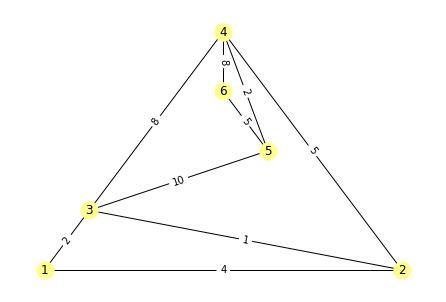

In [8]:
# 图的边，weight为距离
edges = [(1,2, {'weight':4}),
        (1,3,{'weight':2}),
        (2,3,{'weight':1}),
        (2,4, {'weight':5}),
        (3,4, {'weight':8}),
        (3,5, {'weight':10}),
        (4,5,{'weight':2}),
        (4,6,{'weight':8}),
        (5,6,{'weight':5})]
# 边的名称
edge_labels = {(1,2):4, (1,3):2, (2,3):1, (2,4):5, (3,4):8
               , (3,5):10, (4,5):2, (4,6):8, (5,6):5}
   
# 生成图        
G = nx.Graph()
for i in range(1,7):
    G.add_node(i)
G.add_edges_from(edges)

# 绘图
pos = nx.planar_layout(G)
nx.draw(G, node_color="#ffff8f", with_labels=True, pos=pos)

# 在边显示权重(weight)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels);

In [10]:
# 起点为 1，到达其他节点的最短路径
p1 = nx.shortest_path(G, source=1, weight='weight')
p1

{1: [1],
 2: [1, 3, 2],
 3: [1, 3],
 4: [1, 3, 2, 4],
 5: [1, 3, 2, 4, 5],
 6: [1, 3, 2, 4, 5, 6]}

In [4]:
# 起点为 1，终点为 6
p1to6 = nx.shortest_path(G, source=1, target=6, weight='weight')
p1to6

[1, 3, 2, 4, 5, 6]

In [9]:
# 最短路径的总长度
length = nx.shortest_path_length(G, source=1, target=6, weight='weight')
length

15

## 最小生成树(Minimum Spanning Tree)

In [34]:
from networkx.algorithms import tree

# 最小生成树
mst = tree.minimum_spanning_edges(G_karate, algorithm='prim', data=False)
edgelist = list(mst)
sorted(edgelist)     # 排序

[(0, 3),
 (0, 4),
 (0, 5),
 (0, 7),
 (0, 8),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 17),
 (0, 19),
 (0, 21),
 (0, 31),
 (1, 30),
 (2, 27),
 (4, 6),
 (6, 16),
 (9, 2),
 (17, 1),
 (18, 32),
 (19, 33),
 (24, 25),
 (29, 23),
 (31, 24),
 (32, 15),
 (32, 22),
 (33, 9),
 (33, 14),
 (33, 18),
 (33, 20),
 (33, 26),
 (33, 28),
 (33, 29)]

## 极大团(Maximal Clique)侦测

In [35]:
from networkx.algorithms import approximation as aprx

max_clique = aprx.max_clique(G_karate)
max_clique 

{0, 1, 2, 3, 7}

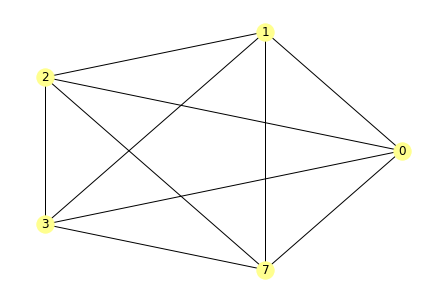

In [36]:
max_clique_subgraph = G_karate.subgraph(max_clique)
# 绘制图形
nx.draw_circular(max_clique_subgraph, node_color="#ffff8f", with_labels=True)

## 极大团(Maximal Clique)生成

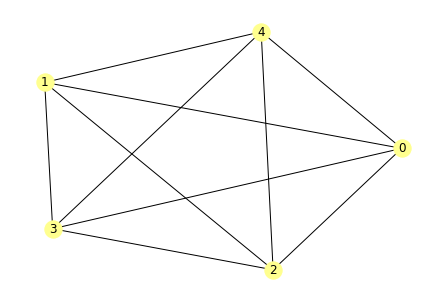

In [37]:
G = nx.complete_graph(5) # 5 个节点
nx.draw(G, node_color="#ffff8f", with_labels=True)

## 社群侦测(Community Detection)

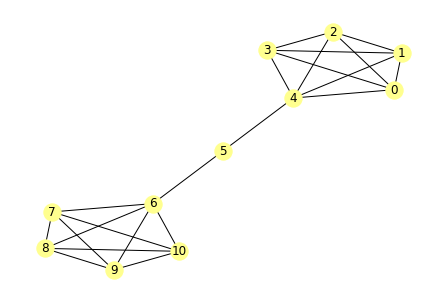

In [38]:
from networkx.algorithms import community

# 内建资料，两个社群，各有 5 个节点，1个相连的节点
G = nx.barbell_graph(5, 1) 
nx.draw_kamada_kawai(G, node_color="#ffff8f", with_labels=True)

## Girvan/Newman分群法

In [39]:
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
top_level_communities

({0, 1, 2, 3, 4}, {5, 6, 7, 8, 9, 10})

In [40]:
next_level_communities = next(communities_generator)
next_level_communities

({0, 1, 2, 3, 4}, {6, 7, 8, 9, 10}, {5})

## 使用回圈产生不同个社群，并显示分群的衡量指标Modularity

In [54]:
from networkx.algorithms import community
import itertools

k = 4 # 分成 2 ~ k+1 群
# Girvan Newman algorithm
comp = community.girvan_newman(G)
for communities in itertools.islice(comp, k):
    print(tuple(sorted(c) for c in communities), ":\t\t", 
          community.modularity(G, communities), ":\t", 
          community.partition_quality(G, communities))

([0, 1, 2, 3, 4], [5, 6, 7, 8, 9, 10]) :		 0.45351239669421484 :	 (0.9545454545454546, 0.9090909090909091)
([0, 1, 2, 3, 4], [6, 7, 8, 9, 10], [5]) :		 0.4514462809917355 :	 (0.9090909090909091, 0.9636363636363636)
([0], [1, 2, 3, 4], [6, 7, 8, 9, 10], [5]) :		 0.3398760330578512 :	 (0.7272727272727273, 0.8909090909090909)
([0], [1], [2, 3, 4], [6, 7, 8, 9, 10], [5]) :		 0.25723140495867763 :	 (0.5909090909090909, 0.8363636363636363)


## Louvain 分群法

In [74]:
G = nx.barbell_graph(5, 1)
community.louvain_communities(G)

[{0, 1, 2, 3, 4, 5}, {6, 7, 8, 9, 10}]

## Asynchronous Fluid 分群法

In [92]:
for k in range(2, 6):
    comp = community.asyn_fluid.asyn_fluidc(G, k)
    print(tuple(sorted(comp)))

({0, 1, 2, 3, 4}, {5, 6, 7, 8, 9, 10})
({6, 7, 8, 9, 10}, {0, 1, 2, 3}, {4, 5})
({8, 9}, {10, 7}, {5, 6}, {0, 1, 2, 3, 4})
({9, 10}, {0, 3}, {1, 2, 4}, {8, 6, 7}, {5})


## python-louvain 套件

In [ ]:
!pip install python-louvain

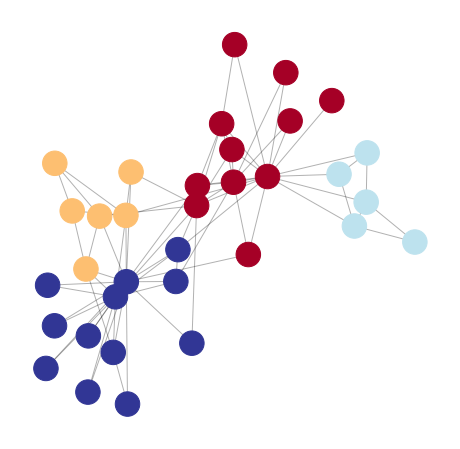

In [53]:
import community
partition = community.best_partition(G_karate)
pos = nx.spring_layout(G_karate)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(G_karate, pos, node_size=600, cmap=plt.cm.RdYlBu
                       , node_color=list(partition.values()))
nx.draw_networkx_edges(G_karate, pos, alpha=0.3)
plt.show(G_karate)